<table border="1" align="center">
    <tr style="background-color:White;">
        <tr style="background-color:white;">
        <td>
            <h2><font color='blue'><center>SYSTEM RELIABILITY OF RETAINING WALL  </center>                      
    <tr style="background-color:brown;">
    </tr>
    <tr style="background-color:brown;">
        <td>
        <h3><font color='Black'> <center>TEAM BROWN</center> </font></h3>
        </td>
        </tr>    
        </table>
 Team Members:
                Rakshya Shrestha;
                Rahul Balmoor;
                Sanni Hirapra.


<h4><font color="purple"> Introduction </font> </h4>

The purpose of this notebook is to illustrate the system reability of retaining wall using the shear strength parameter cohesion(c') and friction angle(phi) using Monte Carlo Simulation.

<h4><font color="black"> There are three failure modes underlying the retaining wall should be considered in the design of a semi gravity retaining wall </font> </h4>

<h4><font color="black"> (1) Sliding along its base </font> </h4>
<h4><font color="black"> (2) Overturning of the wall about its toe </font> </h4>
<h4><font color="black"> (3) Bearing capacity failure of the foundation soil. </font> </h4>

<h4><font color="brown"> Conceptual Model </font> </h4>

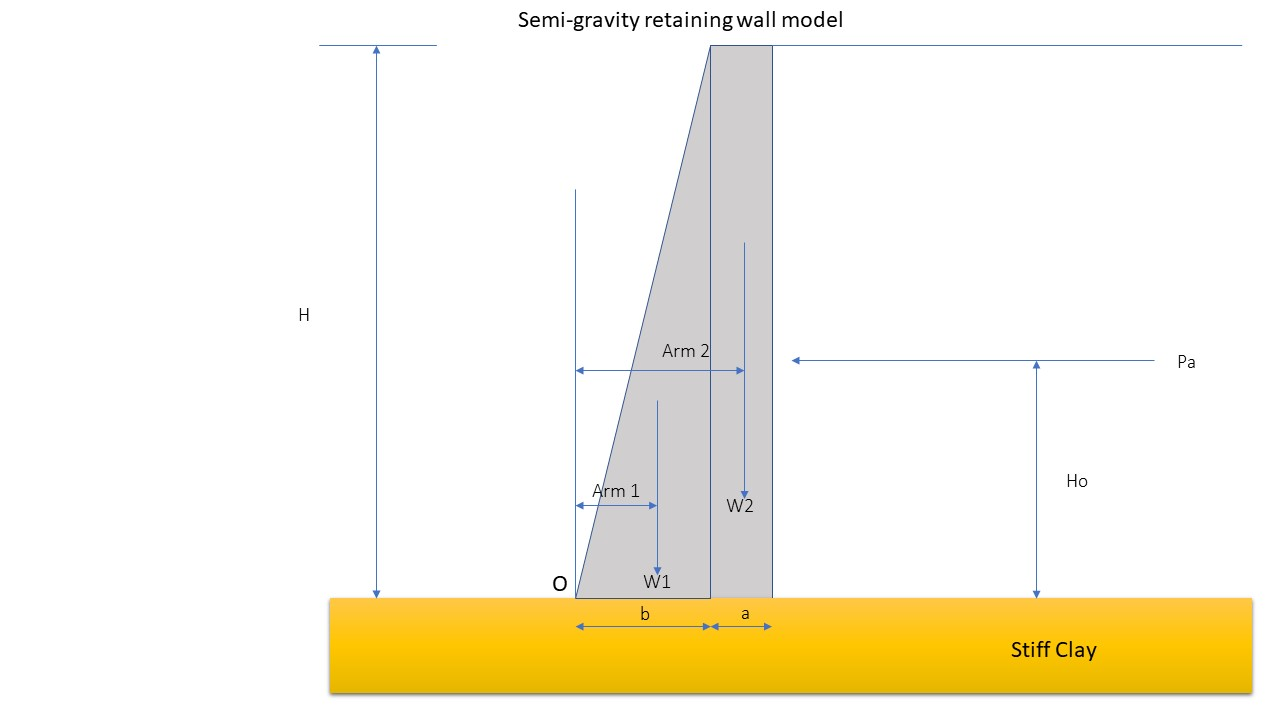

H =  Height of Retaing wall

Ho = Height at which Pa ( active earth thrust ) acts and Ho = Arma

W1 and W2 are components weights of retaining wall

a and b are combined width of retaining wall

Pa is the active earth thrust with a vertical lever distance of Arma

Arm1 and Arm2 are horizontal distance from toe acting loads

<h4><font color="brown"> Governing Equations </font> </h4>

$$
FS_1 = \frac{C'{int}(a+b)+(W1+W2)tan(\phi'{int})}{P_a}
$$
$$
FS_2 = \frac{M_{resisting}}{M_overturning} = \frac{W_1 Arm_1 + W_2Arm_2}{P_aArm_a}
$$

$$
FS_3 = \frac{q_u}{q_{max}}
$$

<h4><font color="brown"> Where </font> </h4>

$$
P_a = {\frac{1}{2}}\gamma_{soil} H^{2} K_a - 2c'H\sqrt{K_{a}}+\frac{2c'^{2}}{\gamma_{soil}}
$$

$$
K_a = tan^{2}\left(\frac{\pi}{4}-\frac{\phi'}{2}\right)
$$

$$
Arm_o = H_o = \frac{1}{3}\left(H-\frac{2c'}{\gamma_{soil}\sqrt{K_{a}}}\right)
$$

$$
W_1 = \frac{1}{2}\gamma_{wall}bH,Arm_1 = \frac{2}{3}b, W_2 =\gamma_{wall}aH,Arm_2=b+\frac{a}{2}
$$
$$
q_u=\frac{\gamma B^{2}}{2}N_{\gamma}+\gamma DBN_{q}+cB N_{c}
$$

$$
q_{max} = \frac{W_1+W_2}{a+b}\left(1+\frac{6e}{a+b}\right)
$$

$$
e=\frac{a+b}{2}-\frac{M_{resisting}-M_{overturning}}{W_1+W_2}
$$


$$
Nγ, Nq, Nc are Bearing capacity factors ,a function  of friction angle φ
$$



<h4><font color="brown"> Where </font> </h4>

$$
H=6.5m,\alpha=0.5m,b=1.45m,\gamma_{soil}=15kN/m^{3},\gamma_{wall}=24kN/m^{3},\gamma_{base}=18kN/m^{3},c'{base}=100kPa,\phi'{base}=30^{o}
$$

<h4> <font color= "brown"> Importing Libraries </font></h4>


In [2]:
# Importing  libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

import numpy as np
import math
from scipy.stats import rv_histogram

  

<h4> <font color= "brown"> Inputs for  Monte Carlo Simulation </font></h4>

In [3]:
muc = 66# Mean of Cohesion
muphi = 22 # Mean of Angle of friction
sigmac = 29 # Standard deviation of Cohesion
sigmaphi = 3.4 # Standard deviation of Angle of friction

In [4]:
mu = [muc,muphi] # taking mean of cohesion and angle of friction as array
sigxyr = np.array([sigmac,sigmaphi]).reshape(2,1) # Reshaping standard deviations of bpth into a 2x1 matrix
corr = np.array([1,-0.5,-0.5,1]).reshape(2,2) # Reshaping covaraince to 2x2 matrix 

In [5]:
cov1 = np.multiply(sigxyr,np.transpose(sigxyr)) # Multiplying  Standard deviation matricx with transpose of that same matrix
cov = np.multiply(corr,cov1) # Multiplying the covaraince and the above matrix

In [6]:
Nsim = 1000 # Number of simulations for obtaing normal distribution within that range 
randcphi = st.multivariate_normal.rvs(mu,cov,size=Nsim) # Creating normal distribution for the taken sample size 

<h4> <font color= "brown"> Graph showing corelation between cohesion and angle of friction </font></h4>

Text(0, 0.5, 'Angle of friction')

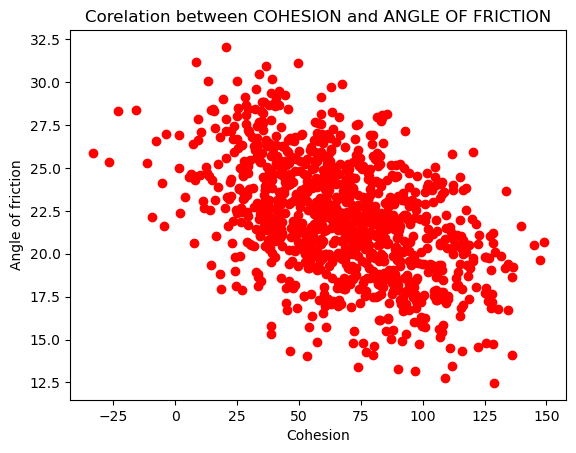

In [7]:
# Plotting the co-relation between COHESION and ANGLE OF FRICTION

plt.plot(randcphi[:,0],randcphi[:,1],'ro')
plt.title('Corelation between COHESION and ANGLE OF FRICTION')

plt.xlabel('Cohesion')
plt.ylabel('Angle of friction')

In [8]:
C, phi = randcphi[:,0], randcphi[:,1] # wrinting the values separately to 'C'and 'phi' for calculating factor of safeties

<h4> <font color= "brown"> Code </font></h4>

<h4> <font color= "brown"> Factore of Safety (FS11) </font></h4>
<h5> <font color= "Black"> Sliding along its base </font></h5>

Defining the required parameteres for calculating factor of safety


In [9]:
def FOS(C,phi): 
    H = 6.5 #unit in m # Height of Retaining wall
    a = 0.5 #unit in m # rectangular base width of retaining wall
    b = 1.45 #unit in m  traingular base width of retaining wall
    gama_soil = 18 #unit in kN/m**3 # specific weight of soil
    gama_wall = 24 #unit in kN/m**3 # specific weight of wall
   

    # Nγ, Nq, Nc are Bearing capacity factors afunction of friction angle φ. 
    #These values are took from Terzaghi's bearing capacity factors and interpolted for phi value = 22
   
    Nc = 19.05
    Nq = 9.29
    Nr = 7.13
   
    qu = (((gama_soil*(a+b)**2)/2)*Nr)+(gama_soil*H*(a+b)*Nq)+(C*(a+b)*Nc) # Bearing capacity of foundation
    
    C_base = 100 #unit in kPa 
    phi_base = 30 #unit in degree
    C_int = (1/3)*C_base
    phi_int = (2/3)*phi_base
    
    W1 = (1/2)*gama_wall*b*H
    W2 = gama_wall*a*H
    Arm1 = (2/3)*b
    Arm2 = b+(a/2)
    Ka = (np.tan(np.radians(45-(phi/2))))**2 # Coefficient of active earth pressure
    Arma = (1/3)*(H-((2*C)/(gama_soil*(Ka**0.5))))
    Pa = (1/2)*gama_soil*(H**2)*Ka - 2*C*H*(Ka**0.5) + ((2*C**2)/gama_soil)
    Mresisting = (W1*Arm1)+(W2*Arm2)
    Moverturning = (Pa*Arma)
    
    FS1 = (C_int*(a+b)+(W1+W2)*math.tan(phi_int))/Pa # Factor of Safety for Sliding

    FS2 = Mresisting/Moverturning # Factor of safety for Overturning
    
    e = ((a+b)/2) - ((Mresisting - Moverturning)/(W1+W2))
    qmax = (W1+W2)/(a+b)*(1+6*e/(a+b))
    
    
    FS3 = qu/qmax # Bearing capacity failure of foundation
    
    return FS1,FS2,FS3

Calling the functiion for getting the values of three factor of safeties

In [10]:
#initialize the vectors to store factor of safety
FS11 = []  # stores values of factor of safety for sliding
FS22 = []  # stores values of factor of safety for overturning
FS33 = []  # stores values of factor of safety for bearing capacity failure
idx = len(C) 
print(idx)
idx = range(0,idx,1)  # create a range to loop over

for i in idx:
    cc = C[i]
    pp = phi[i]
    fos1 = FOS(cc,pp)[0]
    fos2 = FOS(cc,pp)[1]
    fos3 = FOS(cc,pp)[2]
    FS11.append(fos1)
    FS22.append(fos2)
    FS33.append(fos3)
FS11
    

1000


[12.189514074808633,
 3.925480139127982,
 10.12596243875314,
 2.3289019008642247,
 1.8603151664514637,
 6.969039722051498,
 10.564335465685073,
 1.0179691364323207,
 1.3769130923981059,
 2.6190286508201157,
 7.363765296451649,
 18.33433112385441,
 19.70522751014345,
 1.1867677476725191,
 1.7425073465393899,
 5.341666533000172,
 1.572268634111042,
 5.763594249214419,
 63.03909894507049,
 337.23546417424257,
 0.7048074599900037,
 8.676355010204873,
 6.440660107084292,
 2.0436311707972092,
 9.937888907026203,
 15.275016922027573,
 1.271274124331099,
 8.769262465908652,
 0.7315263822946193,
 15.187907944985568,
 12.157984893082672,
 660.9492433909065,
 0.7039834794261388,
 6.268779856869467,
 2.3500874915449095,
 2.5324856396054574,
 2.852242206740181,
 1.9489262408453938,
 2.8011227074623264,
 109.7383689061824,
 5357.078802317094,
 13.86317661770454,
 0.8765787624498955,
 50.03205973091465,
 0.5120613464497209,
 9.758886604703385,
 1.836308076144367,
 11.157057536497216,
 2.7556825426572

 <h4> <font color= "brown"> Creating data frame for the obtained results of factor of safety </font></h4>

In [11]:
df = pd.DataFrame(list(zip(FS11,FS22,FS33)),columns = ['FS11','FS22','FS33'])
df.head()


df=pd.DataFrame({'FS1':FS11,'FS2':FS22,'FS3':FS33})
df
df['Min']= df[['FS1','FS2','FS3']].min(axis=1)
df.describe()

,FS1,FS2,FS3,Min
count,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03
mean,4.507140e+03,-2.746194e+05,139.099884,-4.637709e+05
std,7.830455e+04,1.440958e+07,3084.297721,1.341769e+07
min,3.770722e-01,-4.229388e+08,-5968.059094,-4.229388e+08
25%,1.945590e+00,-3.938362e+00,-19.859404,-4.829764e+01
50%,5.519908e+00,-5.960572e-01,-4.726923,-8.631576e+00
75%,2.795445e+01,-1.161286e-01,31.678335,-2.007361e+00
max,2.113572e+06,1.646299e+08,96183.733562,3.757837e+02


In [18]:
(df['FS3']<0).sum()

709

In [20]:
(df['FS2']<0).sum()

827

 <h4> <font color= "brown"> OBTAINING CDF OF FACTOR OF SAFETY AGAINST SLIDING </font></h4>
 
 Taking the quantile range from 0.05 to 0.999 with 0.005 interval having our quantile on Y-axis and values of facotr of safety on X-axis


In [12]:
p = np.arange(0.05,0.999,0.005)
Q = df.FS1
Qp = np.quantile(Q,p)

Text(0.5, 1.0, 'Empirical Cumulative Distribution Function of Factor Of saftey against sliding')

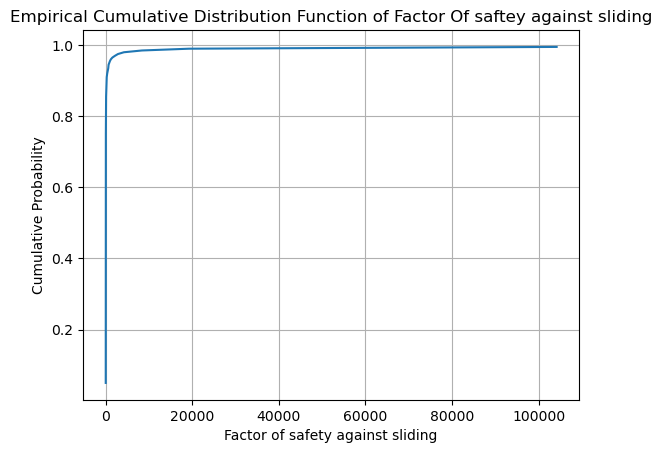

In [13]:
# Plotting the graph 
plt.plot(Qp,p)
plt.xlabel('Factor of safety against sliding')
plt.ylabel('Cumulative Probability')
plt.grid()
plt.title('Empirical Cumulative Distribution Function of Factor Of saftey against sliding')

<h4> <font color= "brown"> OBTAINING CDF OF FACTOR OF SAFETY AGAINST OVERTURNING </font></h4>
 
 Taking the quantile range from 0.05 to 0.999 with 0.005 interval having our quantile on Y-axis and values of facotr of safety on X-axis

Text(0.5, 1.0, 'Empirical Cumulative Distribution Function of Factor Of saftey against Overturning')

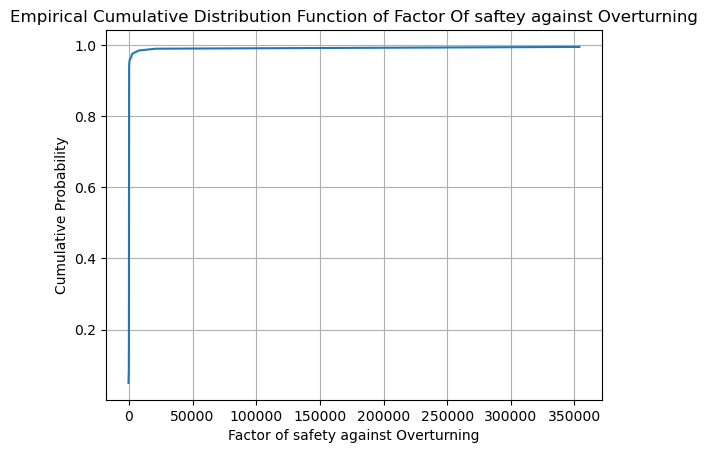

In [14]:
# Plotting the Graph
p1 = np.arange(0.05,0.999,0.005)
Q1p = np.quantile(FS22,p1)
plt.plot(Q1p,p1)
plt.xlabel('Factor of safety against Overturning')
plt.ylabel('Cumulative Probability')
plt.grid()
plt.title('Empirical Cumulative Distribution Function of Factor Of saftey against Overturning')

<h4> <font color= "BROWN"> Taking the quantile range from 0.05 to 0.25 with 0.005 interval for viewing the detailed part of values lying in that range </font></h4>
 


Text(0.5, 1.0, 'Empirical Cumulative Distribution Function of Factor Of saftey against Overturning')

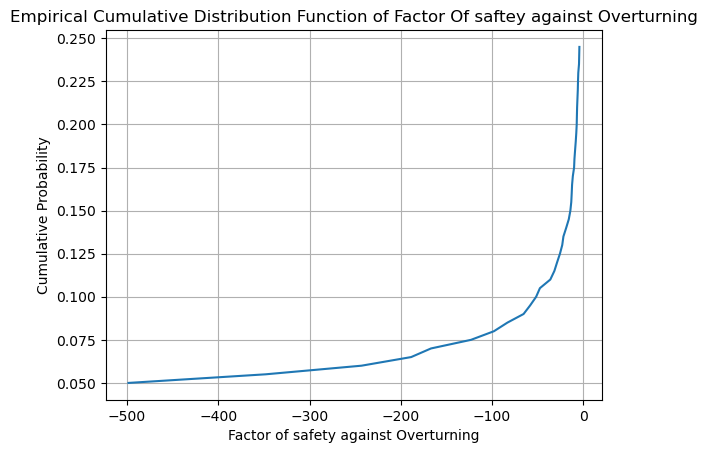

In [196]:
p1 = np.arange(0.05,0.25,0.005)
Q1p = np.quantile(FS22,p1)
plt.plot(Q1p,p1)
plt.xlabel('Factor of safety against Overturning')
plt.ylabel('Cumulative Probability')
plt.grid()
plt.title('Empirical Cumulative Distribution Function of Factor Of saftey against Overturning')

<h4> <font color= "brown"> OBTAINING CDF OF BEARING CAPACITY FAILURE OF THE FOUNDATION </font></h4>


Taking the quantile range from 0.05 to 0.999 with 0.005 interval having our quantile on Y-axis and values of BEARING CAPACITY FAILURE on X-axis

Text(0.5, 1.0, 'Empirical Cumulative Distribution Function of Bearing capacity failure of foundation')

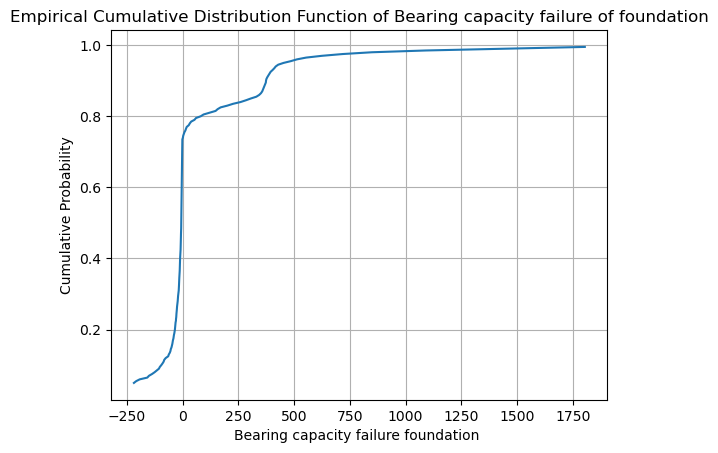

In [197]:
# PLOTTING THE GRAPH
p2 = np.arange(0.05,0.999,0.005)
Q2 = df.FS3
Q2p = np.quantile(Q2,p2)

plt.plot(Q2p,p2)
plt.xlabel('Bearing capacity failure foundation ')
plt.ylabel('Cumulative Probability')
plt.grid()
plt.title('Empirical Cumulative Distribution Function of Bearing capacity failure of foundation')

<h4> <font color= "BROWN"> Taking the quantile range from 0.05 to 0.25 with 0.005 interval for viewing the detailed part of values lying in that range </font></h4>
 

Text(0.5, 1.0, 'Empirical Cumulative Distribution Function of Bearing capacity failure of foundation')

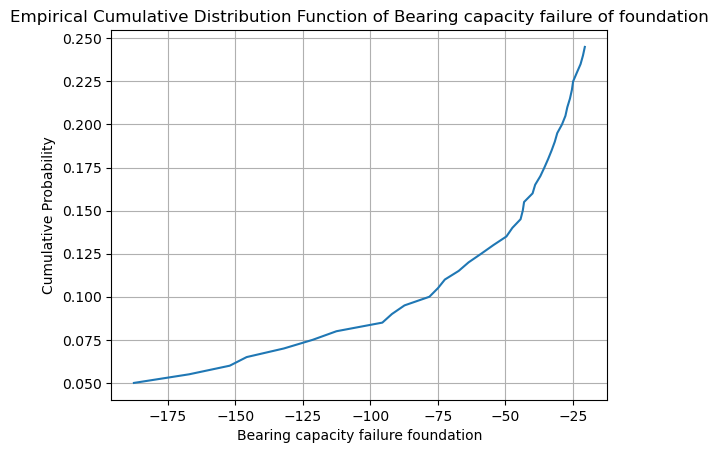

In [15]:
p1 = np.arange(0.05,0.25,0.005)
Q1p = np.quantile(FS33,p1)
plt.plot(Q1p,p1)
plt.xlabel('Bearing capacity failure foundation')
plt.ylabel('Cumulative Probability')
plt.grid()
plt.title('Empirical Cumulative Distribution Function of Bearing capacity failure of foundation')

<h4> <font color= "brown"> OBTAINING CDF FOR THE MINIMUM VALUE AMONG THREE FACTOR OF SAFETY  </font></h4>

#plotting graph for viewing in detail
p2 = np.arange(0.05,0.25,0.005)
Q2p = np.quantile(FS33,p2)
plt.plot(Q2p,p2)

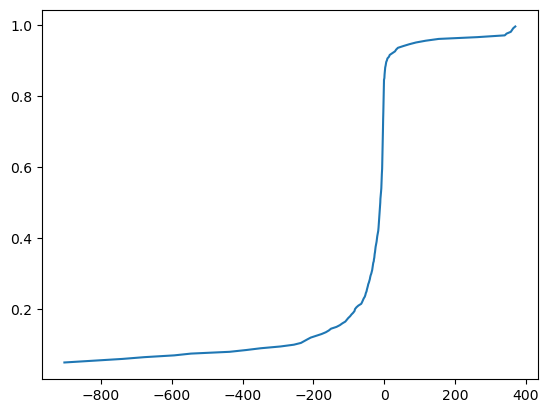

In [194]:
p = np.arange(0.05,0.999,0.005)
Q = df.Min
Qp = np.quantile(Q,p)
plt.plot(Qp,p)

<h4> <font color= "brown"> PROBABILITY OF FAILURE  </font></h4>

In [22]:
(df['FS1']<0).sum() #  probability of failure due to sliding

0

In [23]:
(df['FS2']<0).sum() # probability of failure due to overturning

827

In [24]:
(df['FS3']<0).sum() # probability of failure due to bearing capacity of foundation

709

In [25]:
(df['Min']<0).sum() # Overall failure of all three factor of safety

827

<h4> <font color= "brown"> CONCLUSION </font></h4>

The simulation result indicate that the probabilty values of failures are  more in the case of overturning .
The structure is safe in sliding  but it has more probabilty failure in the case of overturning and bearing capacity .

So the dominant case of failure is in 'FAILURE DUE TO OVERTURNING' and the percentage of failures is 82.7%.
Overall structure failure probability is also 82.7%

<h4> <font color= "RED"> THANK YOU</font></h4>